# Classificação de imagens usando rede neural - MNIST

O conjunto de dados MNIST (Modified National Institute of Standards and Technology database) é um grande conjunto de dados de dígitos manuscritos comumente usado na área de aprendizado de máquina. Ele consiste de 60.000 imagens de treinamento e 10.000 images de teste. As imagens do conjunto são de 28x28 pixels. Uma descrição completa do conjunto de dados pode ser encontrada [aqui](https://en.wikipedia.org/wiki/MNIST_database).

O objetivo principal deste notebook é:
- ilustrar o uso de uma rede neural para uma tarefa de classificação de imagens.


In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Dropout, Input
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint
import numpy as np

*1. Para que serve a biblioteca KERAS? Pesquise sobre ela e tente entender porque ela é necessária. Se não quisermos usar esta biblioteca, qual são as alternativas?*

RESP: Keras é uma biblioteca de aprendizado profundo, oferecendo uma interface de programação (API) em Python para acesso à implementação em Tensorflow. Como alternativas, podemos citar Matlab, Pytorch, e implementações proprietárias como Nvidia Digits, Microsoft CNTK, entre outras.

## Carregando os conjuntos de treino e de teste

In [2]:
#Loading the data using keras utility
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Printing the shape of the train and test sets
print(x_train.shape)
print(x_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


## Mostrando o conjunto de treino

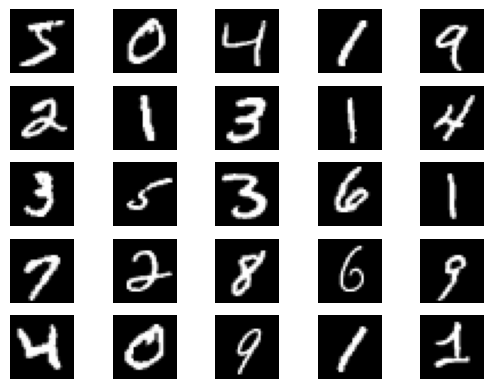

In [3]:
#Displaying a few samples of the training set
fig, ax = plt.subplots(nrows=5, ncols=5)
counter = 0
for row in ax:
    for col in row:
        col.imshow(x_train[counter], cmap = 'gray')
        col.axis("off")
        counter+=1
plt.show()

## Mostrando o conjunto de teste

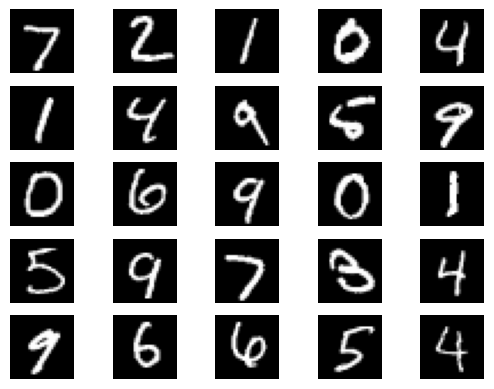

In [4]:
#Displaying a few samples of the test set
fig, ax = plt.subplots(nrows=5, ncols=5)
counter = 0
for row in ax:
    for col in row:
        col.imshow(x_test[counter], cmap = 'gray')
        col.axis("off")
        counter+=1
plt.show()

## Normalizando os dados

In [5]:
#Setting training parameters
batch_size = 128
num_classes = 10
epochs = 20

#Normalizing data between 0 and 1
x_train = x_train.reshape(60000, 784) #784 = 28*28
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# One hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


*2(a). No trecho de código acima identificado "normalizing data between 0 and 1" o que a função reshape está fazendo?*

RESP: A função reshape está alterando o formato das matrizes de dados de treinamento e de teste, que tinham um formato tridimensional, com linhas x 28x28 para um formato bidimensional, com o mesmo número de linhas mas com 784 colunas, distribuindo o conteúdo que estava em um formato 28x28.

*2(b). O que faz o trecho do código identificado como "One hot encoding"? Explique para que serve e o que ele modifica no dado original y_train e y_test.*

RESP: O trecho de código transforma dados categóricos dos vetores y_train e y_test (que são informações de classes que cada amostras de entrada é classificada) em uma estrutura matricial bidimensional onde cada classe é mapeada ao digito "1", algo do tipo:

[ 1, 2, 3, 4 ] -->


[ 1 0 0 0 0 ] Classe 1

[ 0 1 0 0 0 ] Classe 2

[ 0 0 1 0 0 ] Classe 3

[ 0 0 0 1 0 ] Classe 4

## Definindo o modelo

In [6]:
#Defining the Neural Network architecture
def my_model():
    inputs = Input(shape=(784,))
    out1 = Dense(512, activation='relu')(inputs)
    out2 = Dropout(0.2)(out1)
    out3 = Dense(512, activation='relu')(out2)
    out4 = Dropout(0.2)(out3)
    out5 = Dense(10, activation='softmax')(out4)
    model = Model(inputs=inputs, outputs=out5)
    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    return model

*3. Qual o tipo de modelo (rede) está sendo construída acima: rede neural convencional ou rede neural convolucional? Como você chegou na esta conclusão? Quantas camadas ela possui e para que serve cada uma delas?*

RESP: A rede neural acima é uma rede neural convencional, dado que as camadas são definidas com a função Dense(). 

De acordo com a documentação do Keras:

https://keras.io/api/layers/core_layers/dense/

*Just your regular densely-connected NN layer.*

A rede possui 3 camadas densas, a saber:

- Camada densa de entrada, com 784 entradas e 512 saídas, com transformação não linear Relu e camada de dropout na saída.
- Camada densa intermediária, com 512 entradas e 512 saídas, com transformação não linear Relu e camada de dropout na saída.
- Camada densa de saída, com 512 entradas e 10 saídas, com ativação softmax para classificação final em 10 classes.

## Resumo do modelo 

In [7]:
#Building the model and showing a summary
model = my_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable

# Treinando o modelo

In [8]:
# Checkpoint callback to save model after each improvement along the epochs
checkpoint = ModelCheckpoint('mnist_keras.model', monitor='val_loss'
                             ,verbose=0,save_weights_only= True,
                             save_best_only=True)
epochs = 4
#Training the model
history_model = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split= 0.2,callbacks = [checkpoint])

Epoch 1/4
375/375 [==============================] - 22s 47ms/step - loss: 0.2785 - accuracy: 0.9142 - val_loss: 0.1248 - val_accuracy: 0.9615
Epoch 2/4
375/375 [==============================] - 9s 24ms/step - loss: 0.1112 - accuracy: 0.9660 - val_loss: 0.0961 - val_accuracy: 0.9723
Epoch 3/4
375/375 [==============================] - 9s 23ms/step - loss: 0.0797 - accuracy: 0.9762 - val_loss: 0.0898 - val_accuracy: 0.9739
Epoch 4/4
375/375 [==============================] - 8s 23ms/step - loss: 0.0630 - accuracy: 0.9804 - val_loss: 0.0883 - val_accuracy: 0.9767


*4. Em aula foi falado que é fundamental usarmos durante o treinamento um conjunto de treino e de validação. Aqui, estamos passando como entrada da função model.fit apenas o conjunto de treino, x_train. Isto está correto?*

RESP: Sim, está correto pois a funcão fit() do Keras permite a definição do conjunto de validação de forma implícita através do parâmetro *validation_split* de acordo com a documentação:

*Here's another option: the argument validation_split allows you to automatically reserve part of your training data for validation. The argument value represents the fraction of the data to be reserved for validation, so it should be set to a number higher than 0 and lower than 1. For instance, validation_split=0.2 means "use 20% of the data for validation", and validation_split=0.6 means "use 60% of the data for validation".*

No caso um conjunto de validação de 20% dos dados de treinamento foi definido.

## Curva de treino e validação

In [9]:
history_model.history

{'loss': [0.2784861922264099,
  0.11119870096445084,
  0.07968950271606445,
  0.06299585103988647],
 'accuracy': [0.9142083525657654,
  0.9660208225250244,
  0.9761666655540466,
  0.9804375171661377],
 'val_loss': [0.12483496218919754,
  0.09610901772975922,
  0.08981149643659592,
  0.08827164024114609],
 'val_accuracy': [0.9614999890327454,
  0.9723333120346069,
  0.9739166498184204,
  0.9766666889190674]}

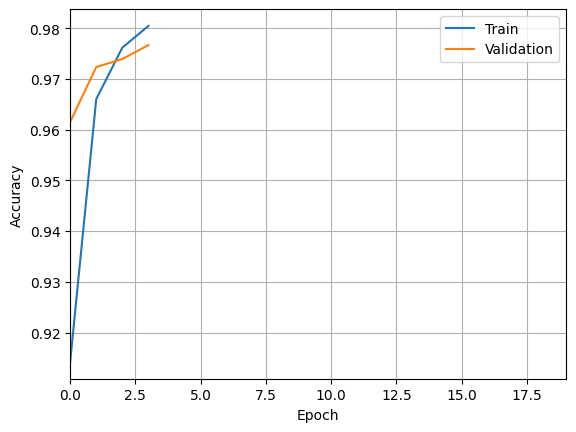

In [10]:
#Plot accuracy history
plt.plot(history_model.history['accuracy'], label = "Train")
plt.plot(history_model.history['val_accuracy'],label = "Validation")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.xlim(0,19)
plt.grid()
plt.show()

## Carregando o melhor modelo e avaliando no conjunto de teste

In [11]:
#Load the best_model during training
best_model = my_model()
best_model.load_weights('mnist_keras.model')

#Evaluate the model on the test set
score = best_model.evaluate(x_test, y_test, verbose=0)
print('Test loss: %f' %score[0])
print('Test accuracy: %f' %score[1])

Test loss: 0.079058
Test accuracy: 0.979200


## Mostrando alguns erros de predição


313/313 [==============================] - 1s 4ms/step


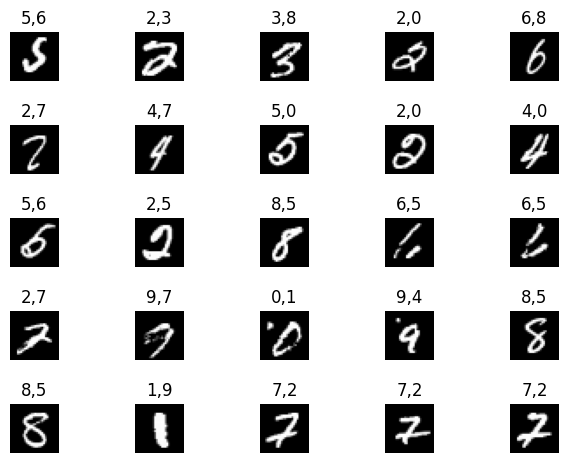

In [12]:
# Run predicition
ypred = best_model.predict(x_test).argmax(axis = 1)
y_test2 = y_test.argmax(axis = 1)

# See samples where prediction failed
indexes = np.where(ypred!=y_test2)[0][::-1]

#Display some of the errors
x_test = x_test.reshape(-1,28,28)
fig, ax = plt.subplots(nrows=5, ncols=5)
plt.tight_layout()
counter = 0
for row in ax:
    for col in row:
        aux = indexes[counter]
        col.imshow(x_test[aux], cmap = 'gray')
        col.axis("off")
        col.set_title("%d,%d" %(y_test2[aux],ypred[aux]))
        counter+=1
plt.show()

## Mostrando os pesos como imagens 

(784, 512)


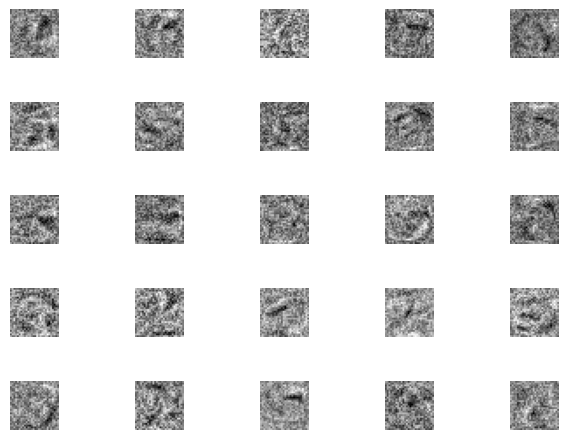

In [13]:
weights, biases = best_model.layers[1].get_weights()
print(weights.shape)
fig, ax = plt.subplots(nrows=5, ncols=5)
plt.tight_layout()
counter = 0
for row in ax:
    for col in row:
        aux = indexes[counter]
        col.imshow(weights[:,-counter].reshape(28,28), cmap = 'gray')
        col.axis("off")
        counter+=1
plt.show()

## Sugestão de atividade (opcional)

- Tente melhorar o resultado do modelo no conjunto de teste, aumentando o número de épocas de treinamento. Use a GPU do Colab e acompanhe a curva de erro (loss) para garantir que não haja overfitting.